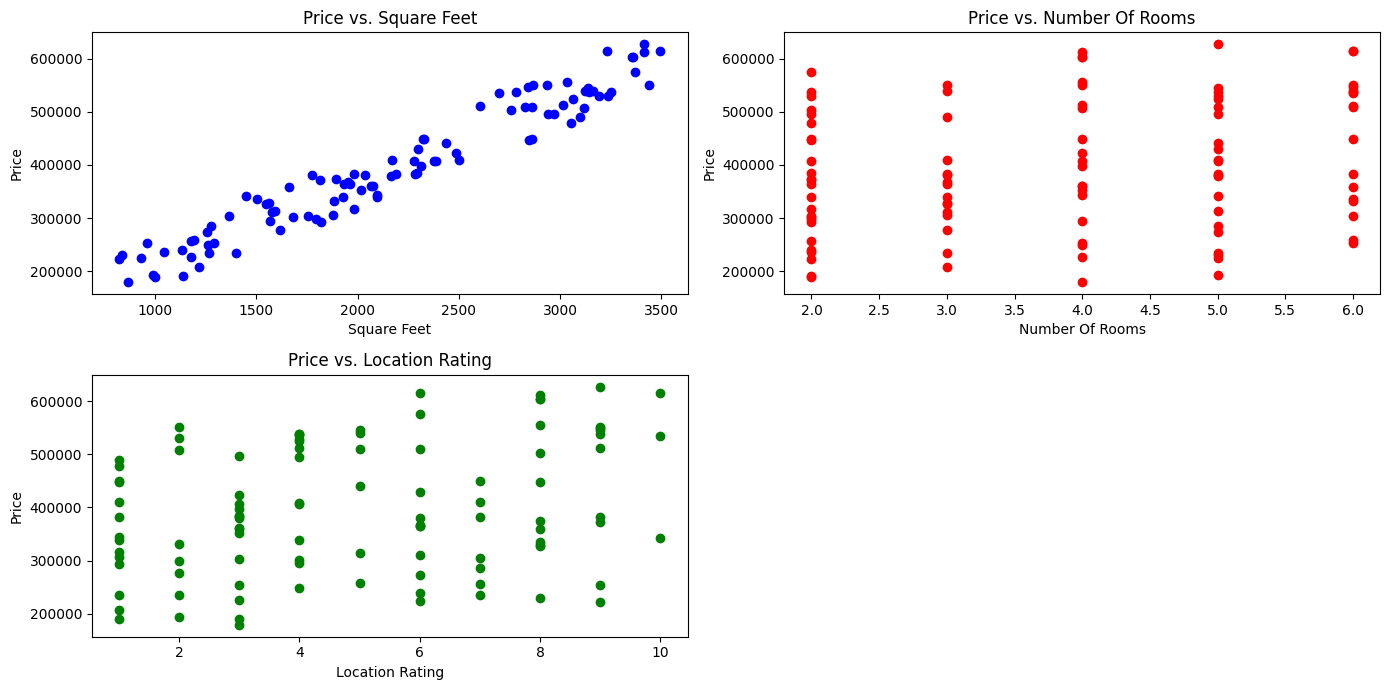

Final Training Set: MSE = 8943998.54, R^2 = 1.00
Final Testing Set: MSE = 12422265.00, R^2 = 1.00


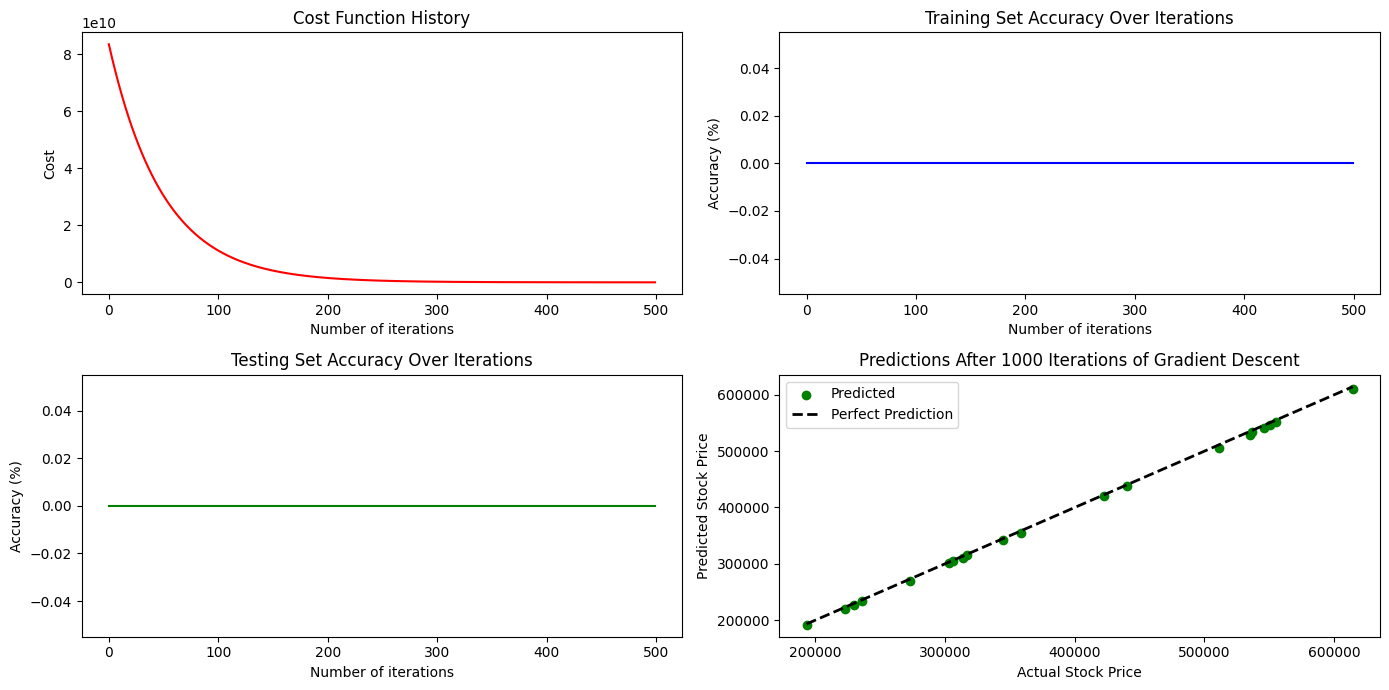

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dataset
data = pd.read_csv("E:\MScFT\Semester 3\AI in Finance\_Practicals\exam\custom_house_data.csv")

# Features and target variable
X = data[['Square_Feet', 'Number_Of_Rooms', 'Location_Rating']]
y = data['House_Price']

# Plot raw data
plt.figure(figsize=(14, 7))

# Plot 1: Price vs. Square Feet
plt.subplot(2, 2, 1)
plt.scatter(data['Square_Feet'], y, color='blue')
plt.title('Price vs. Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Price')

# Plot 2: Price vs. Number Of Rooms
plt.subplot(2, 2, 2)
plt.scatter(data['Number_Of_Rooms'], y, color='red')
plt.title('Price vs. Number Of Rooms')
plt.xlabel('Number Of Rooms')
plt.ylabel('Price')

# Plot 3: Price vs. Location Rating
plt.subplot(2, 2, 3)
plt.scatter(data['Location_Rating'], y, color='green')
plt.title('Price vs. Location Rating')
plt.xlabel('Location Rating')
plt.ylabel('Price')


plt.tight_layout()
plt.show()

# Continue with gradient descent algorithm...
# Initialize parameters
theta = np.zeros(X.shape[1] + 1)  # Including intercept

# Normalize features
X = (X - X.mean()) / X.std()
X.insert(0, 'Intercept', 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Define hyperparameters
alpha = 0.01  # Learning rate
iterations = 500  # Number of iterations

# Define cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Define accuracy function
def calculate_accuracy(y_actual, y_pred, threshold=5):
    accuracy = np.mean(np.abs(y_actual - y_pred) <= threshold) * 100
    return accuracy

# Gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    accuracy_history_train = np.zeros(iterations)
    accuracy_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (alpha / m) * X.T.dot(predictions - y)
        cost_history[i] = compute_cost(X, y, theta)

        # Calculate accuracy at each iteration
        y_train_pred = X_train.dot(theta)
        y_test_pred = X_test.dot(theta) 
        accuracy_history_train[i] = calculate_accuracy(y_train, y_train_pred)
        accuracy_history_test[i] = calculate_accuracy(y_test, y_test_pred)

    return theta, cost_history, accuracy_history_train, accuracy_history_test

# Perform gradient descent
theta, cost_history, accuracy_history_train, accuracy_history_test = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Evaluate the model
mse_train_final = mean_squared_error(y_train, X_train.dot(theta))
r2_train_final = r2_score(y_train, X_train.dot(theta))
mse_test_final = mean_squared_error(y_test, X_test.dot(theta))
r2_test_final = r2_score(y_test, X_test.dot(theta))

print(f"Final Training Set: MSE = {mse_train_final:.2f}, R^2 = {r2_train_final:.2f}")
print(f"Final Testing Set: MSE = {mse_test_final:.2f}, R^2 = {r2_test_final:.2f}")

# Plot the results after gradient descent
plt.figure(figsize=(14, 7))

# Cost Function History
plt.subplot(2, 2, 1)
plt.plot(range(iterations), cost_history, 'r')
plt.title('Cost Function History')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

# Accuracy on Training Set
plt.subplot(2, 2, 2)
plt.plot(range(iterations), accuracy_history_train, 'b')
plt.title('Training Set Accuracy Over Iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy (%)')

# Accuracy on Testing Set
plt.subplot(2, 2, 3)
plt.plot(range(iterations), accuracy_history_test, 'g')
plt.title('Testing Set Accuracy Over Iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy (%)')

# Final predictions after gradient descent vs Actual (Testing Set)
plt.subplot(2, 2, 4)
plt.scatter(y_test, X_test.dot(theta), color='green', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Predictions After 500 Iterations of Gradient Descent')
plt.legend()

plt.tight_layout()
plt.show()
